# Figure 2b - Varying M

updated: May 18, 2022

This notebook plots the following:

* Part 1 - RFLO with varying M

* Part 2 - REINFORCE with varying Wbmi0

The code is based on a previous notebook: `/NeurIPS-2022-4-29/Figure-Covariance-Comparison-5-2-2022.ipynb`

file location: `rnn-learning/experiments/NeurIPS-2022-5-16/Fig2b-Main-Results-2022-5-18.ipynb`

In [19]:
folder = 'figs-2022-5-18/'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator,FixedFormatter
import matplotlib.pylab as pylab

# analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy import interpolate # don't import stats
from scipy import linalg as LA
from scipy.ndimage.filters import uniform_filter1d

# miscellaneous
from tqdm import tqdm
from itertools import cycle
from copy import deepcopy
import pickle

import logging
import warnings
import dataclasses
from dataclasses import dataclass
from typing import Optional, List

import sys
sys.path.append("../..")

In [3]:
from rnn import RNNparams, RNN
from task import Task
from simulation import Simulation
from algorithms.bptt import BPTT
from algorithms.rflo import RFLO
from algorithms.reinforce import REINFORCE
from algorithms.track_vars import TrackVars

from utils.plotting import plot_trained_trajectories, paper_format
from utils.metric import cos_sim, return_norm_and_angle
from utils.functions import choose_aligned_matrix

from utils.metric import cos_sim, flow_field_data, flow_field_predicted, calculate_flow_field_correlation


# RFLO with varied M

In [5]:
trial_duration = 20
n_in=4
frac_on = 0.2

x_tonic = 0.0*np.ones((trial_duration, n_in)) # shape 20 x 4 i.e. time x channel
x_pulse1 = x_tonic.copy()
x_pulse2 = x_tonic.copy()
x_pulse3 = x_tonic.copy()
x_pulse4 = x_tonic.copy()
x_pulse1[0:int(trial_duration*frac_on),0] = 1
x_pulse2[0:int(trial_duration*frac_on),1] = 1
x_pulse3[0:int(trial_duration*frac_on),2] = 1
x_pulse4[0:int(trial_duration*frac_on),3] = 1

task1 = Task(x_in=x_pulse1,y_target=np.asarray([[1],[1]]))
task2 = Task(x_in=x_pulse2,y_target=np.asarray([[-1],[1]]))
task3 = Task(x_in=x_pulse3,y_target=np.asarray([[1],[-1]]))
task4 = Task(x_in=x_pulse4,y_target=np.asarray([[-1],[-1]]))

7it [00:00, 69.46it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fd022102288>


2500it [00:28, 88.63it/s]
5it [00:00, 46.97it/s]

M norm: 1.32	 M angle: 0.41, 113 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.32	 w_out1 vs. w_m angle: 0.41
w_m norm: 1.84	 w_out vs. w_m angle: 0.15

500it [00:06, 82.62it/s]
1500it [00:21, 69.71it/s]
500it [00:04, 108.67it/s]


AR early fit 0.929, late fit 0.959


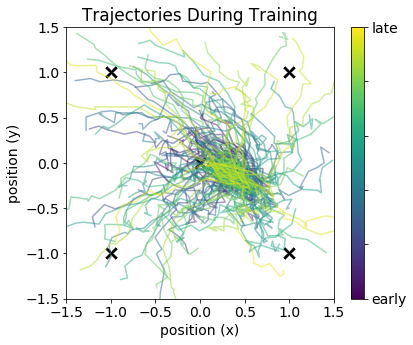

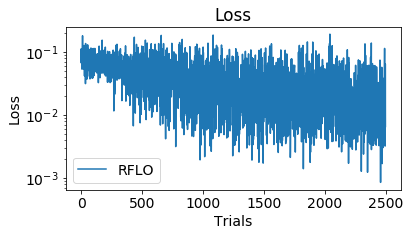

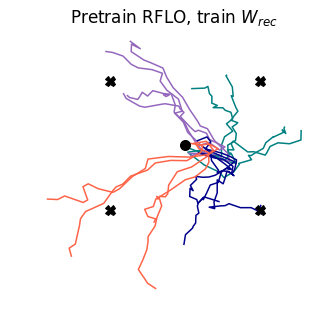

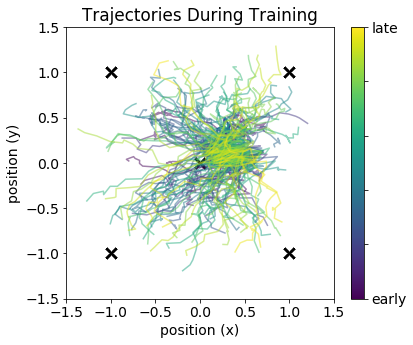

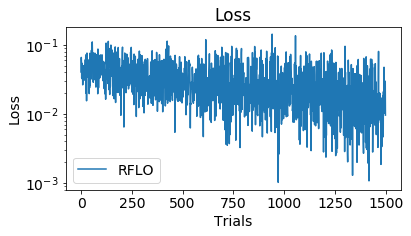

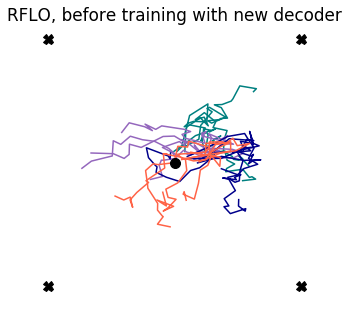

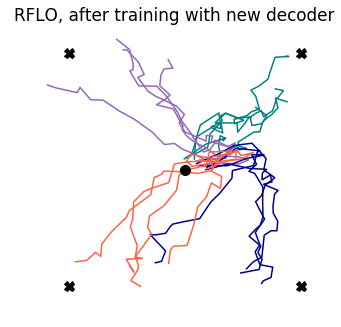

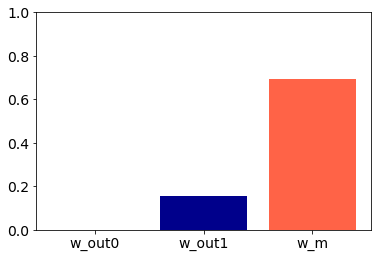

7it [00:00, 44.86it/s]

M norm: 1.21	 M angle: 0.49, 34 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.21	 w_out1 vs. w_m angle: 0.49
w_m norm: 1.85	 w_out vs. w_m angle: 0.11

500it [00:04, 103.21it/s]
1500it [00:16, 91.09it/s]
500it [00:04, 117.79it/s]


AR early fit 0.929, late fit 0.944


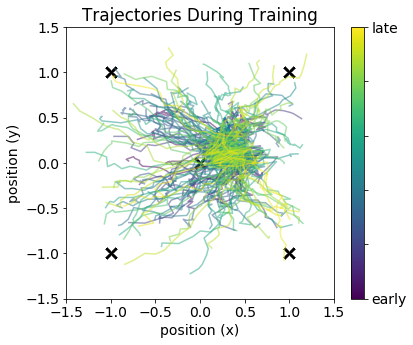

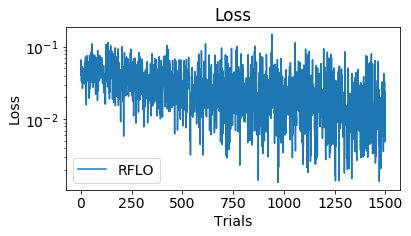

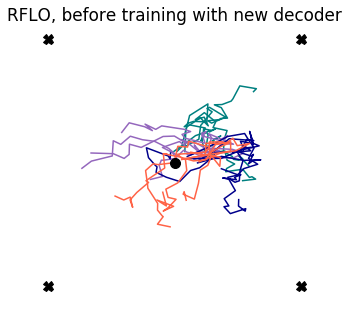

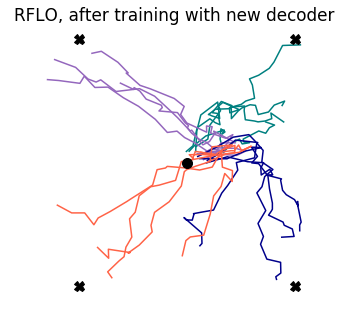

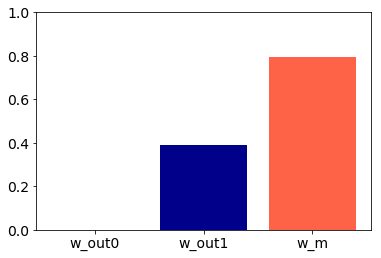

9it [00:00, 86.23it/s]

M norm: 1.11	 M angle: 0.60, 12 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.60
w_m norm: 1.72	 w_out vs. w_m angle: 0.29

500it [00:04, 121.20it/s]
1500it [00:15, 97.15it/s]
500it [00:03, 126.11it/s]


AR early fit 0.929, late fit 0.955


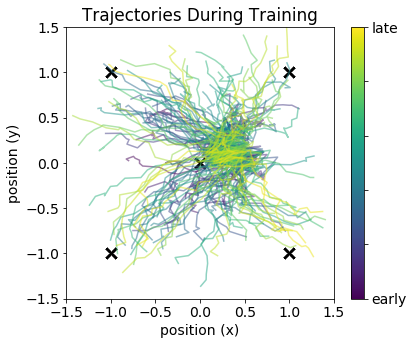

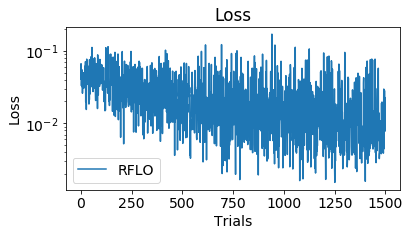

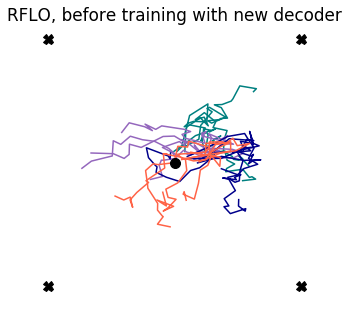

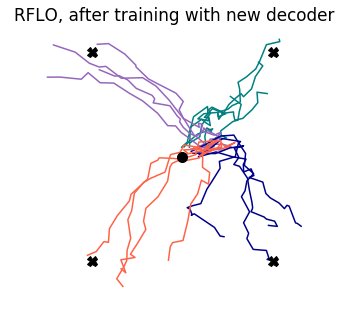

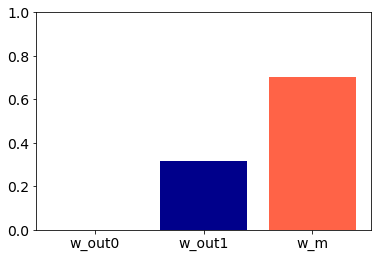

10it [00:00, 96.60it/s]

M norm: 0.97	 M angle: 0.70, 4 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.97	 w_out1 vs. w_m angle: 0.70
w_m norm: 1.67	 w_out vs. w_m angle: 0.33

500it [00:03, 125.36it/s]
1500it [00:19, 77.99it/s]
500it [00:05, 91.99it/s] 


AR early fit 0.929, late fit 0.953


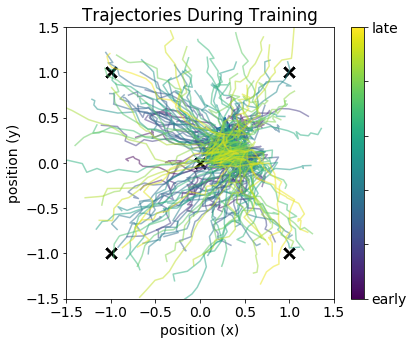

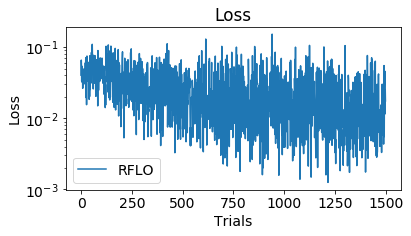

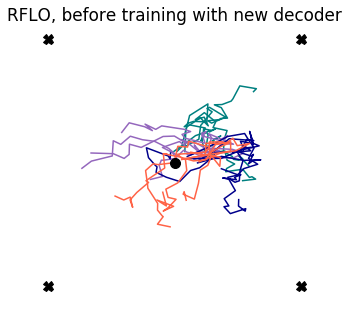

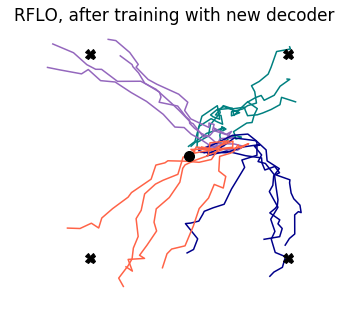

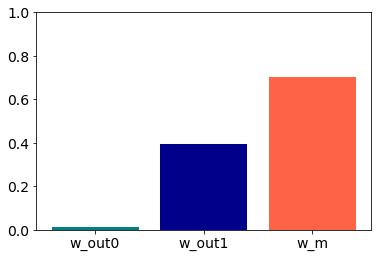

11it [00:00, 103.14it/s]

M norm: 0.80	 M angle: 0.81, 2 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.80	 w_out1 vs. w_m angle: 0.81
w_m norm: 1.69	 w_out vs. w_m angle: 0.35

500it [00:03, 126.55it/s]
1500it [00:17, 85.63it/s]
500it [00:04, 120.99it/s]


AR early fit 0.929, late fit 0.948


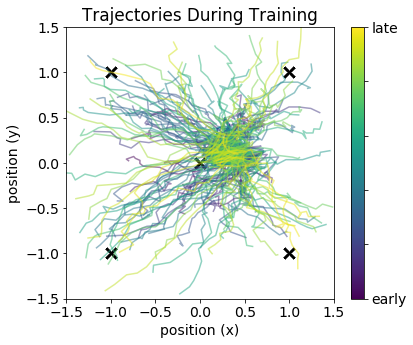

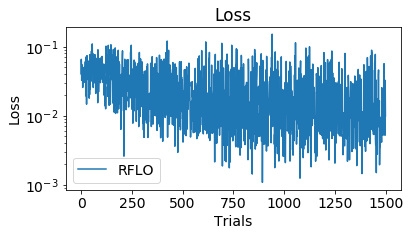

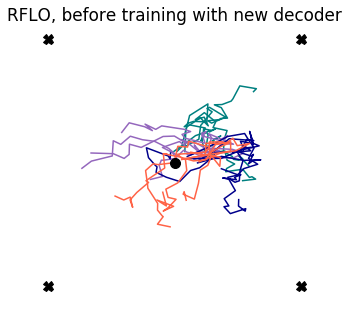

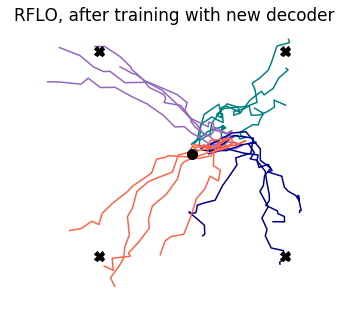

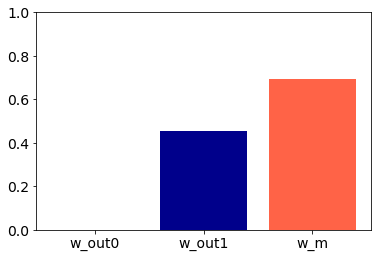

9it [00:00, 89.72it/s]

M norm: 0.56	 M angle: 0.91, 29 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.56	 w_out1 vs. w_m angle: 0.91
w_m norm: 1.63	 w_out vs. w_m angle: 0.40

500it [00:03, 125.35it/s]
1500it [00:16, 89.60it/s]
500it [00:04, 105.30it/s]


AR early fit 0.929, late fit 0.951


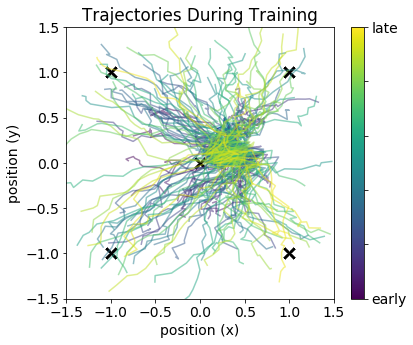

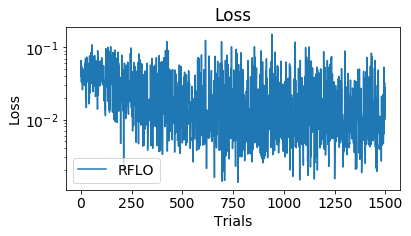

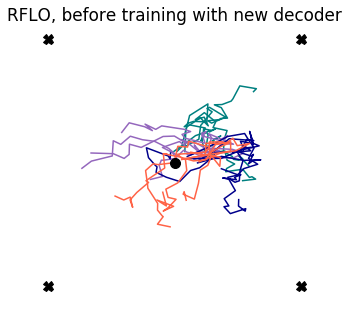

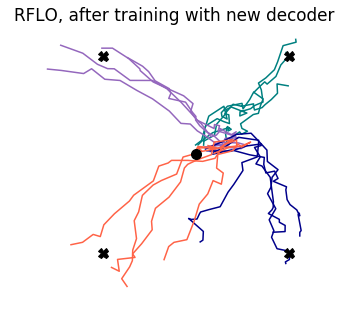

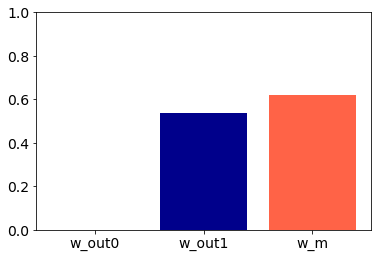

8it [00:00, 79.09it/s]

M norm: 0.00	 M angle: 1.00, 0 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.00	 w_out1 vs. w_m angle: 1.00
w_m norm: 1.52	 w_out vs. w_m angle: 0.51

500it [00:04, 115.80it/s]
1500it [00:15, 98.17it/s]
500it [00:03, 126.28it/s]


AR early fit 0.929, late fit 0.951


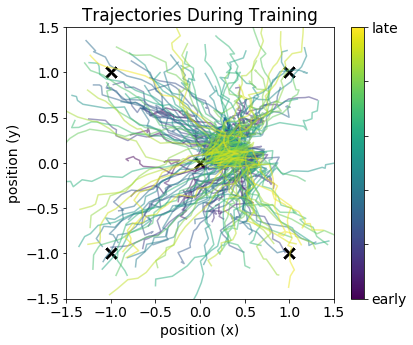

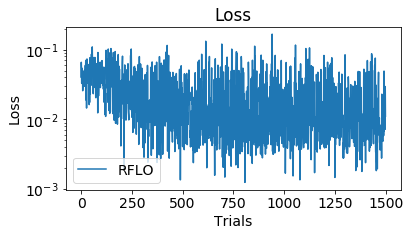

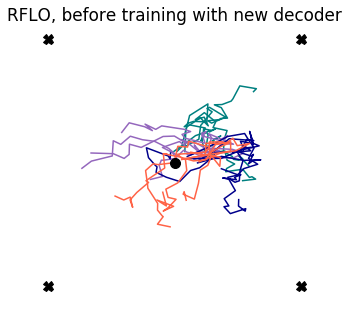

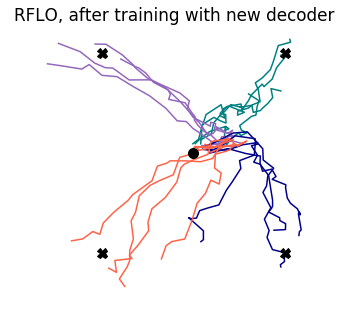

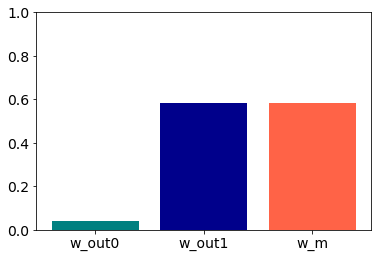

6it [00:00, 58.44it/s]

M norm: 1.18	 M angle: 0.39, 47 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.18	 w_out1 vs. w_m angle: 0.39
w_m norm: 1.78	 w_out vs. w_m angle: 0.12

500it [00:04, 124.77it/s]
1500it [00:15, 98.88it/s]
500it [00:03, 125.96it/s]


AR early fit 0.929, late fit 0.956


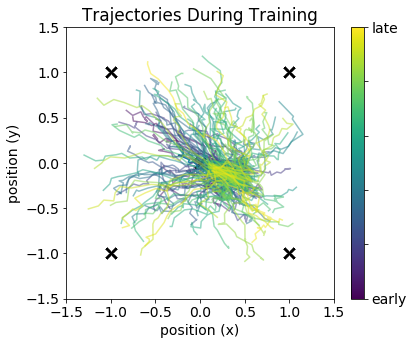

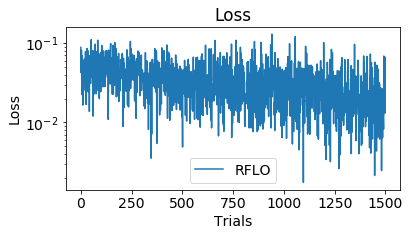

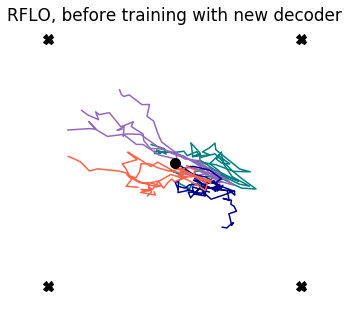

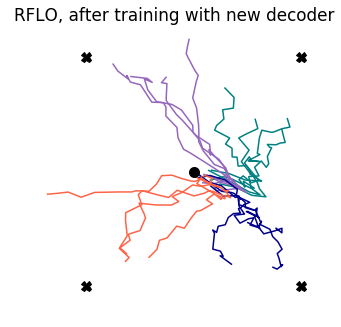

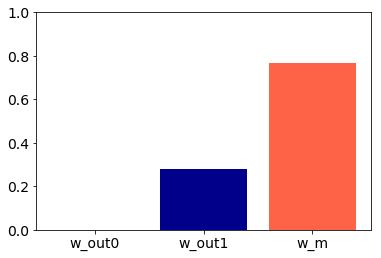

7it [00:00, 66.18it/s]

M norm: 1.13	 M angle: 0.50, 5 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.13	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.76	 w_out vs. w_m angle: 0.21

500it [00:04, 118.10it/s]
1500it [00:15, 99.33it/s]
500it [00:04, 116.17it/s]


AR early fit 0.929, late fit 0.951


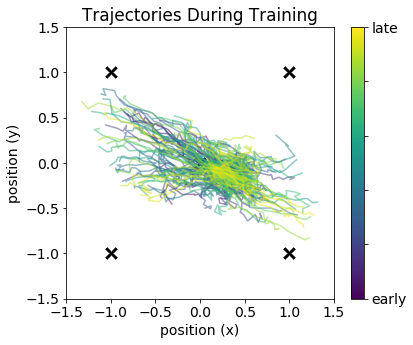

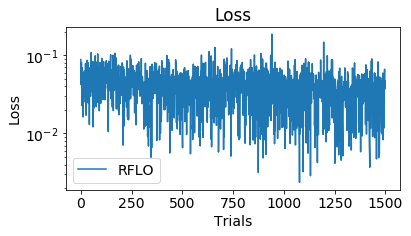

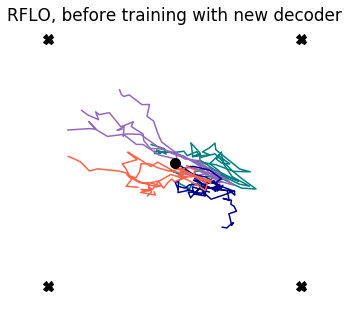

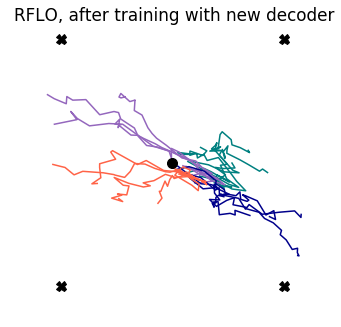

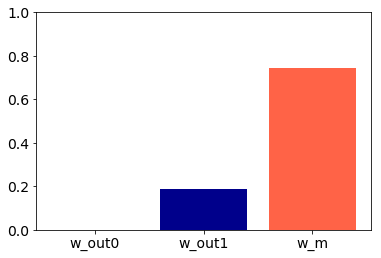

7it [00:00, 68.70it/s]

M norm: 1.01	 M angle: 0.61, 14 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.01	 w_out1 vs. w_m angle: 0.61
w_m norm: 1.67	 w_out vs. w_m angle: 0.31

500it [00:04, 124.47it/s]
1500it [00:15, 98.37it/s]
500it [00:03, 126.12it/s]


AR early fit 0.929, late fit 0.957


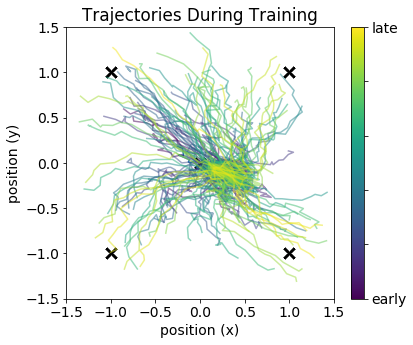

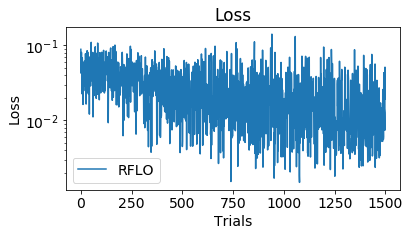

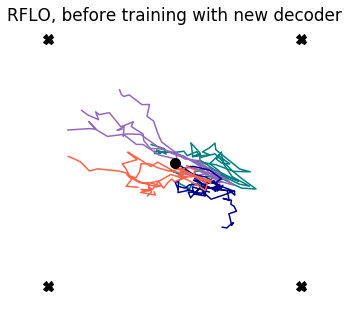

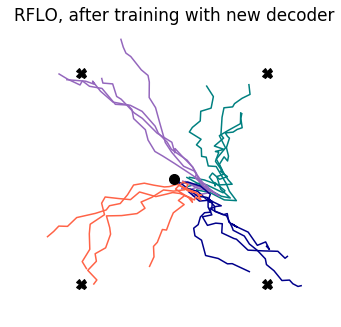

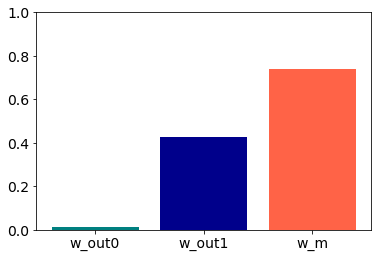

7it [00:00, 65.82it/s]

M norm: 0.89	 M angle: 0.70, 17 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.89	 w_out1 vs. w_m angle: 0.70
w_m norm: 1.57	 w_out vs. w_m angle: 0.41

500it [00:04, 124.01it/s]
1500it [00:15, 99.29it/s]
500it [00:04, 119.83it/s]


AR early fit 0.929, late fit 0.958


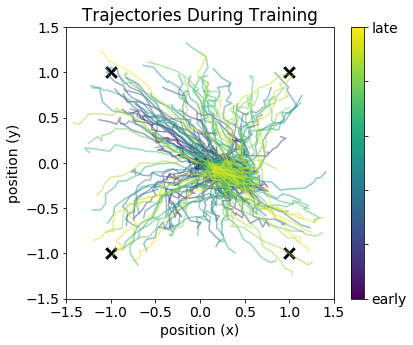

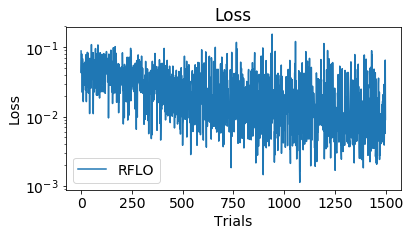

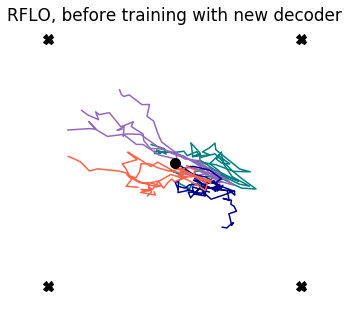

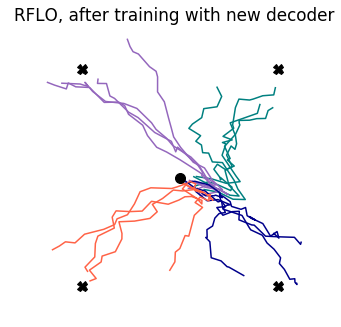

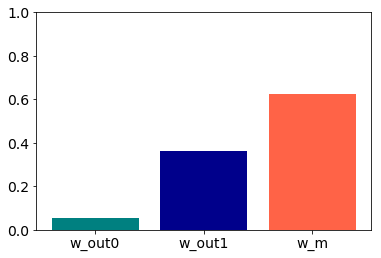

9it [00:00, 85.60it/s]

M norm: 0.73	 M angle: 0.80, 0 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.73	 w_out1 vs. w_m angle: 0.80
w_m norm: 1.66	 w_out vs. w_m angle: 0.33

500it [00:04, 121.38it/s]
1500it [00:17, 84.53it/s]
500it [00:04, 121.73it/s]


AR early fit 0.929, late fit 0.954


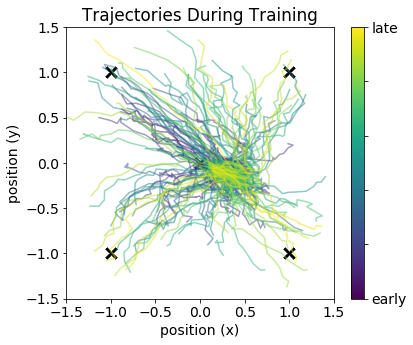

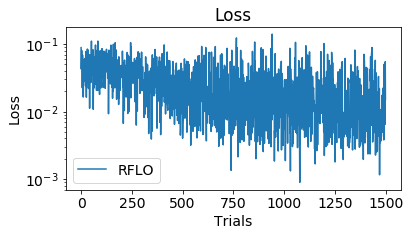

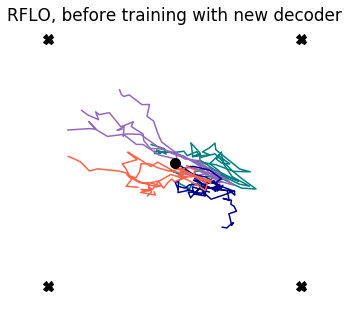

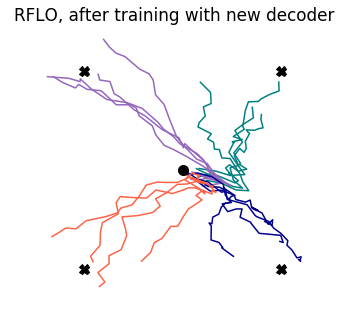

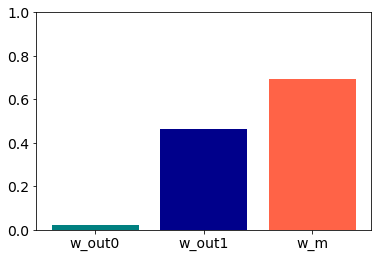

7it [00:00, 67.91it/s]

M norm: 0.53	 M angle: 0.90, 252 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.53	 w_out1 vs. w_m angle: 0.90
w_m norm: 1.55	 w_out vs. w_m angle: 0.45

500it [00:04, 122.43it/s]
1500it [00:15, 97.57it/s]
500it [00:03, 125.98it/s]


AR early fit 0.929, late fit 0.958


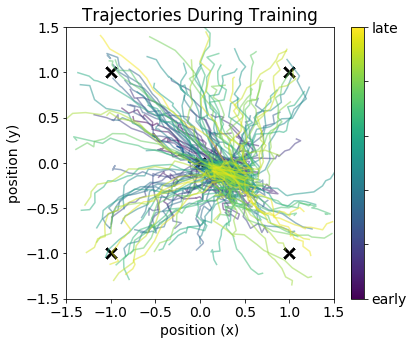

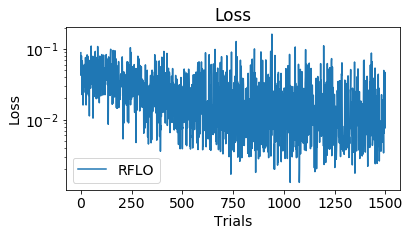

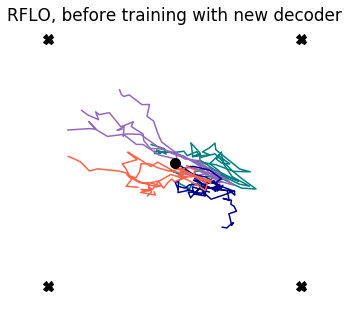

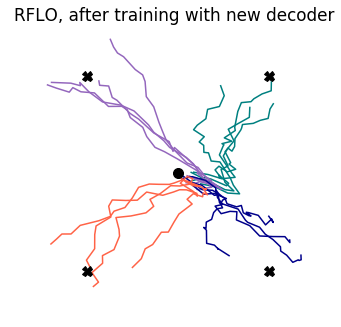

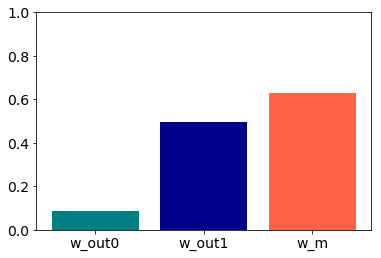

7it [00:00, 69.04it/s]

M norm: 0.00	 M angle: 1.00, 0 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.00	 w_out1 vs. w_m angle: 1.00
w_m norm: 1.50	 w_out vs. w_m angle: 0.50

500it [00:04, 127.82it/s]
1500it [00:15, 94.33it/s]
500it [00:03, 126.57it/s]


AR early fit 0.929, late fit 0.953


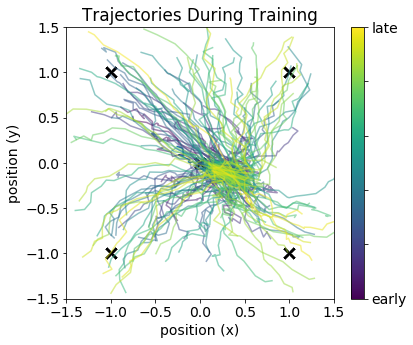

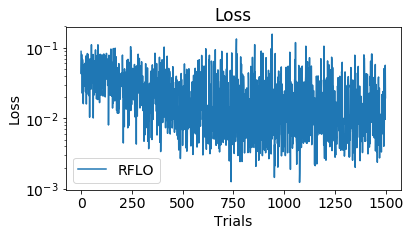

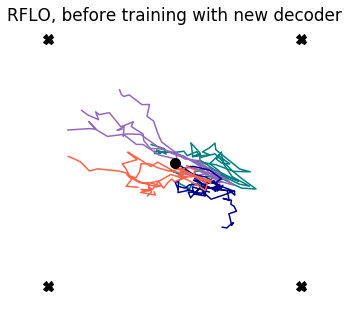

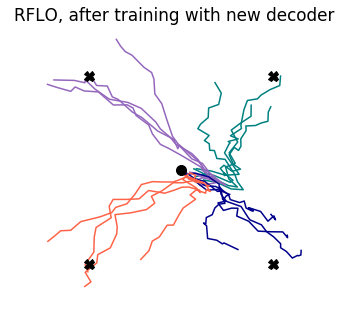

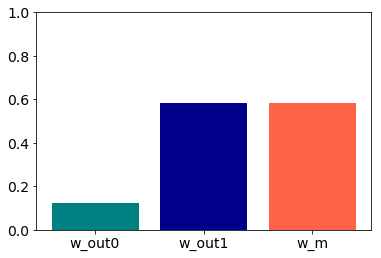

10it [00:00, 97.98it/s]

M norm: 1.28	 M angle: 0.40, 7 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.28	 w_out1 vs. w_m angle: 0.40
w_m norm: 1.77	 w_out vs. w_m angle: 0.23

500it [00:04, 124.50it/s]
1500it [00:15, 99.90it/s]
500it [00:03, 125.37it/s]


AR early fit 0.929, late fit 0.958


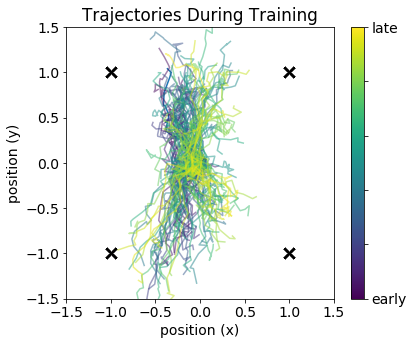

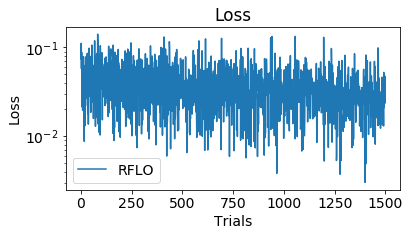

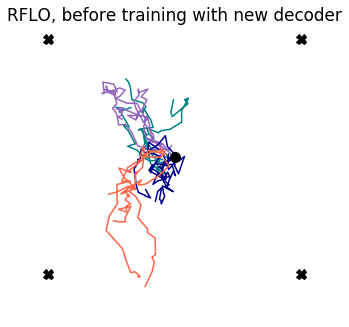

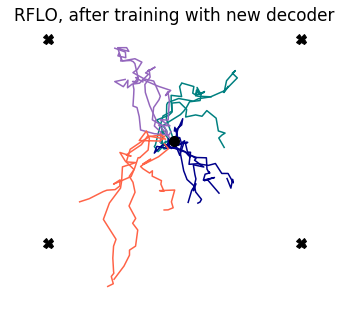

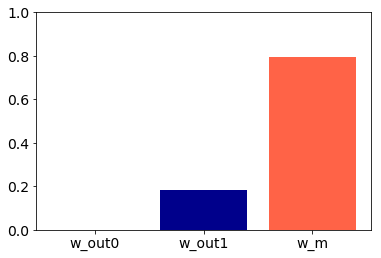

11it [00:00, 109.63it/s]

M norm: 1.14	 M angle: 0.51, 9 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.14	 w_out1 vs. w_m angle: 0.51
w_m norm: 1.84	 w_out vs. w_m angle: 0.14

500it [00:04, 122.70it/s]
1500it [00:15, 99.12it/s]
500it [00:03, 126.34it/s]


AR early fit 0.929, late fit 0.949


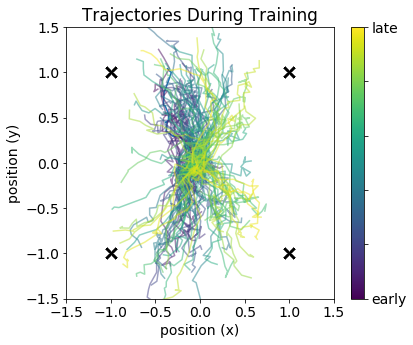

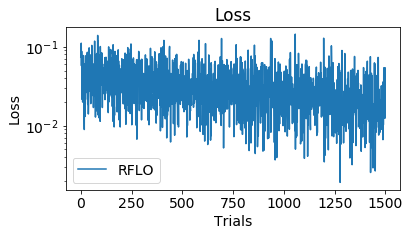

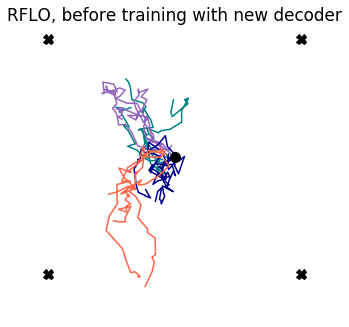

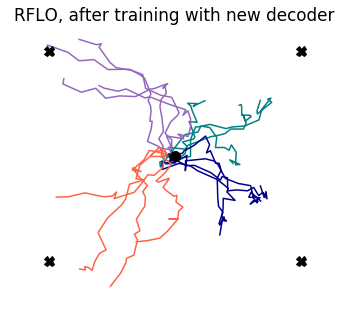

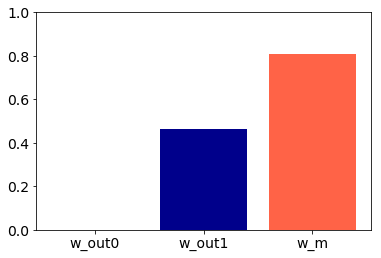

10it [00:00, 96.63it/s]

M norm: 1.07	 M angle: 0.59, 17 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.07	 w_out1 vs. w_m angle: 0.59
w_m norm: 1.64	 w_out vs. w_m angle: 0.36

500it [00:04, 105.11it/s]
1500it [00:15, 94.42it/s]
500it [00:04, 124.93it/s]


AR early fit 0.929, late fit 0.949


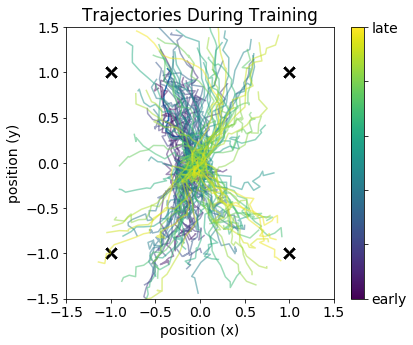

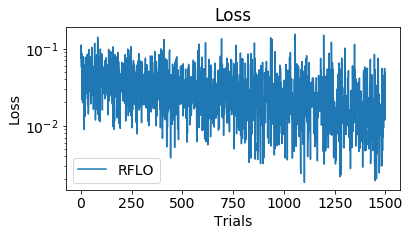

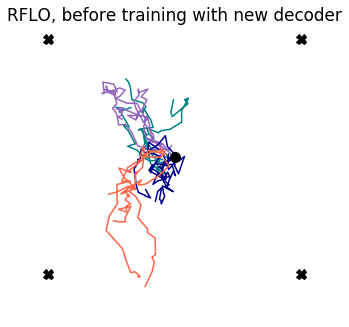

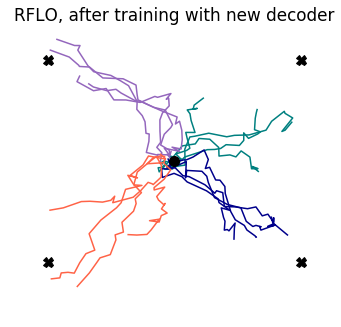

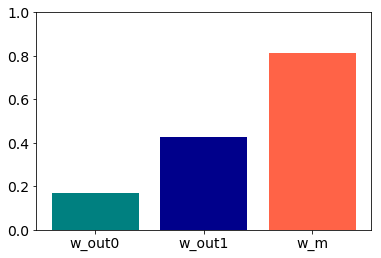

11it [00:00, 108.24it/s]

M norm: 0.93	 M angle: 0.70, 0 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.93	 w_out1 vs. w_m angle: 0.70
w_m norm: 1.45	 w_out vs. w_m angle: 0.52

500it [00:04, 121.91it/s]
1500it [00:15, 97.66it/s]
500it [00:03, 125.83it/s]


AR early fit 0.929, late fit 0.953


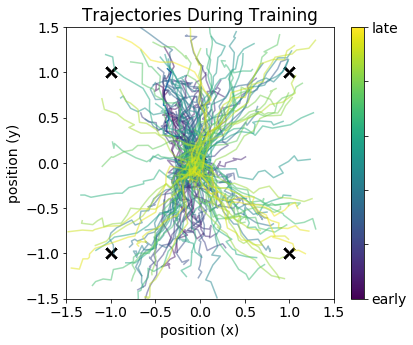

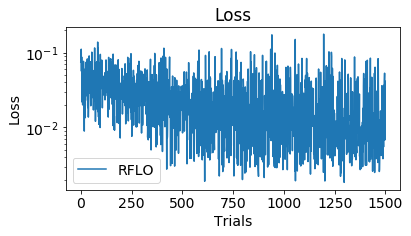

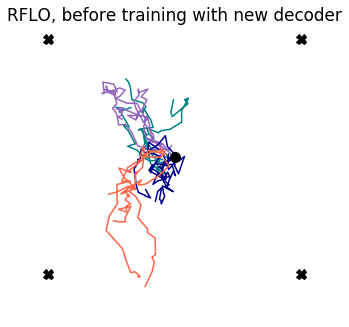

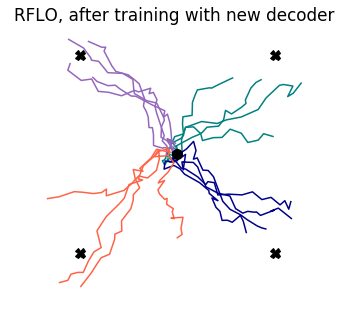

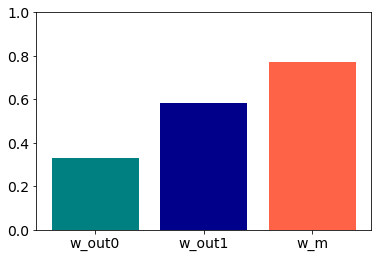

11it [00:00, 103.93it/s]

M norm: 0.76	 M angle: 0.80, 10 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.76	 w_out1 vs. w_m angle: 0.80
w_m norm: 1.56	 w_out vs. w_m angle: 0.43

500it [00:03, 125.89it/s]
1500it [00:15, 98.37it/s]
500it [00:03, 125.53it/s]


AR early fit 0.929, late fit 0.947


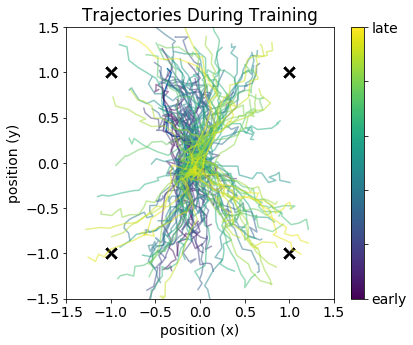

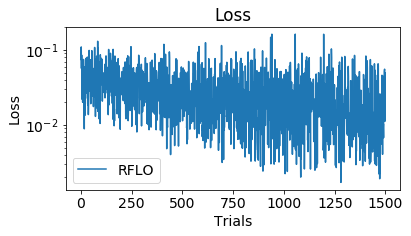

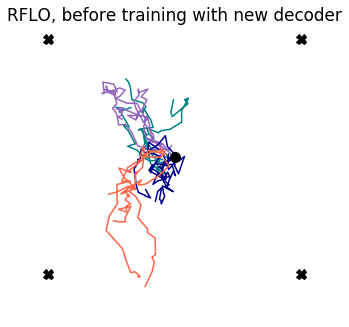

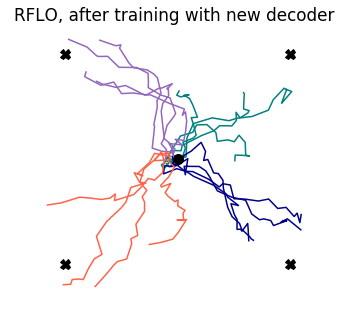

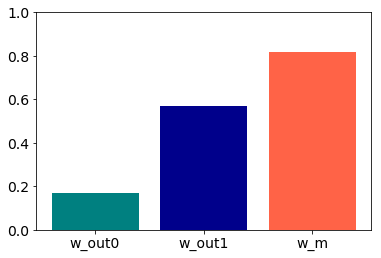

12it [00:00, 111.70it/s]

M norm: 0.54	 M angle: 0.90, 1 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.54	 w_out1 vs. w_m angle: 0.90
w_m norm: 1.50	 w_out vs. w_m angle: 0.50

500it [00:04, 124.26it/s]
1500it [00:17, 87.68it/s]
500it [00:05, 83.69it/s] 


AR early fit 0.929, late fit 0.947


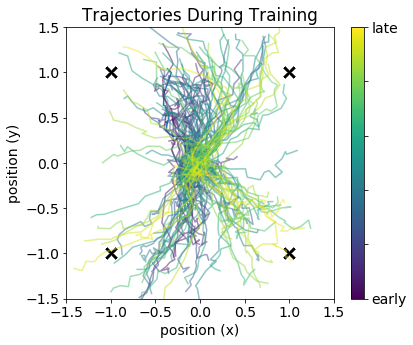

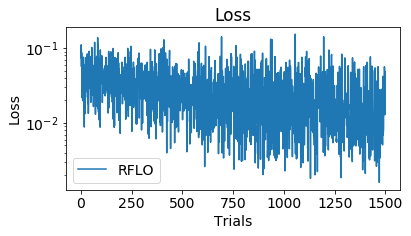

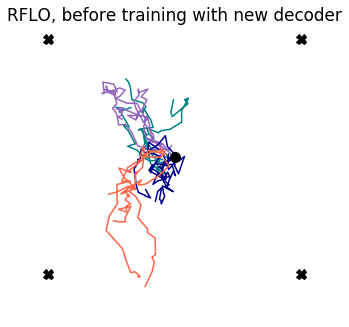

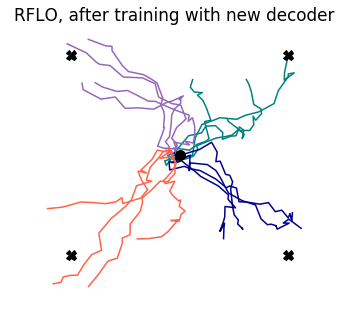

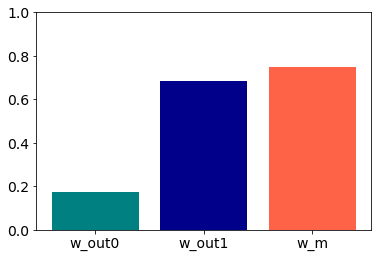

10it [00:00, 93.18it/s]

M norm: 0.00	 M angle: 1.00, 0 iterations
w_out1 norm: 1.50	 w_out vs. w_out1 angle: 0.50
w_m norm: 0.00	 w_out1 vs. w_m angle: 1.00
w_m norm: 1.50	 w_out vs. w_m angle: 0.50

500it [00:04, 114.35it/s]
1500it [00:16, 89.39it/s]
500it [00:04, 121.75it/s]


AR early fit 0.929, late fit 0.948


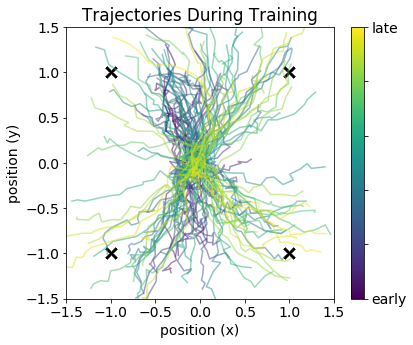

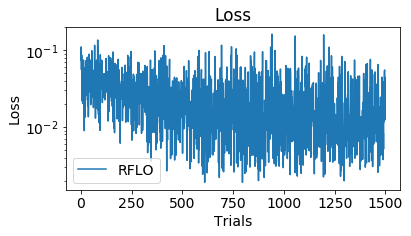

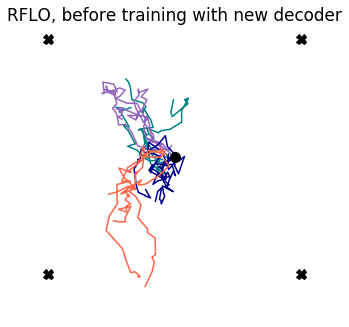

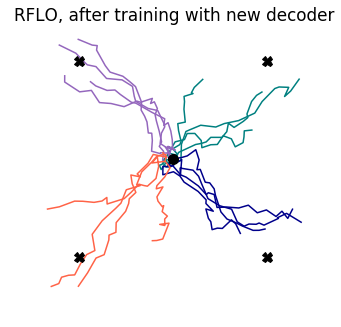

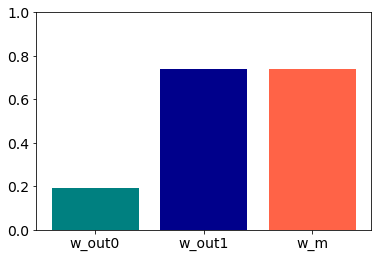

9it [00:00, 89.45it/s]

M norm: 1.17	 M angle: 0.39, 6 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.17	 w_out1 vs. w_m angle: 0.39
w_m norm: 1.76	 w_out vs. w_m angle: 0.16

500it [00:04, 108.22it/s]
1500it [00:16, 91.70it/s]
500it [00:04, 119.50it/s]


AR early fit 0.929, late fit 0.949


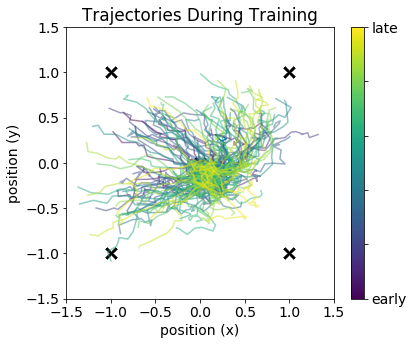

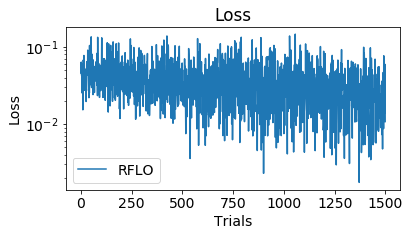

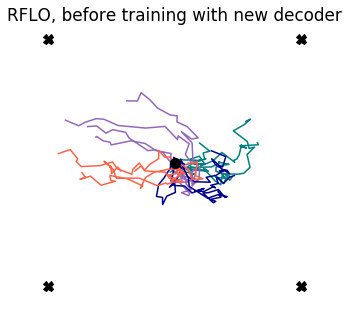

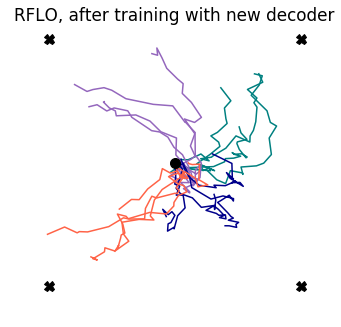

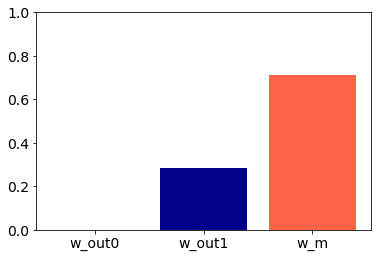

10it [00:00, 92.40it/s]

M norm: 1.11	 M angle: 0.50, 11 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.70	 w_out vs. w_m angle: 0.26

500it [00:04, 120.91it/s]
1500it [00:16, 92.12it/s]
500it [00:04, 115.81it/s]


AR early fit 0.929, late fit 0.957


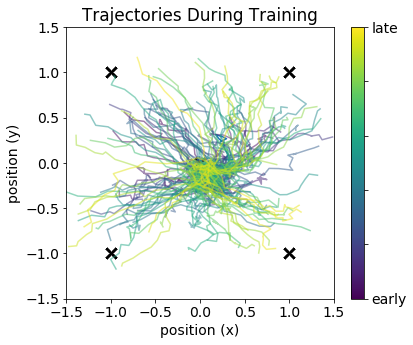

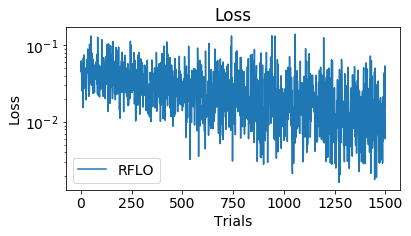

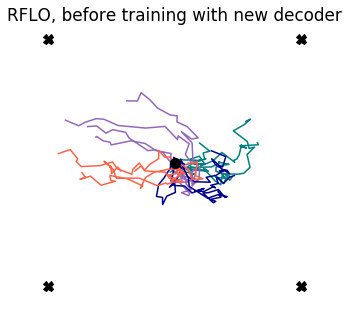

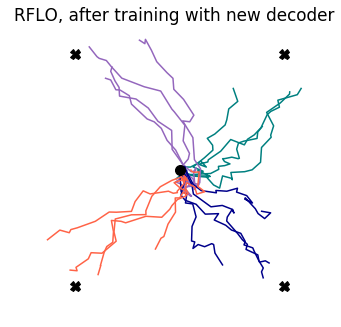

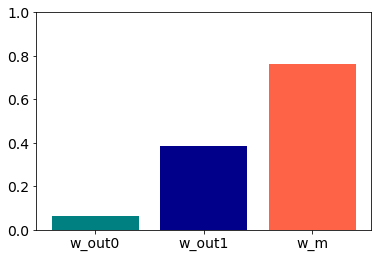

11it [00:00, 108.59it/s]

M norm: 1.00	 M angle: 0.60, 3 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.00	 w_out1 vs. w_m angle: 0.60
w_m norm: 1.56	 w_out vs. w_m angle: 0.41

500it [00:04, 114.49it/s]
1500it [00:18, 82.79it/s]
500it [00:04, 122.86it/s]


AR early fit 0.929, late fit 0.957


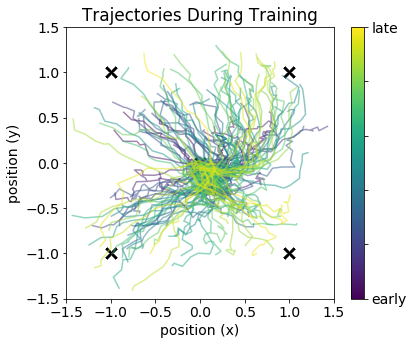

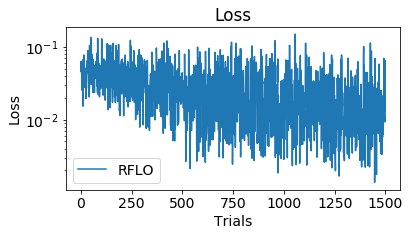

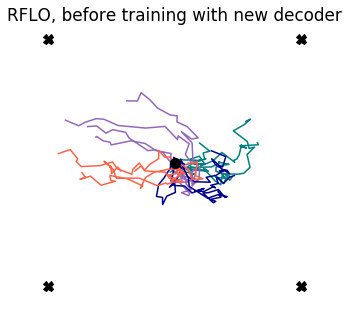

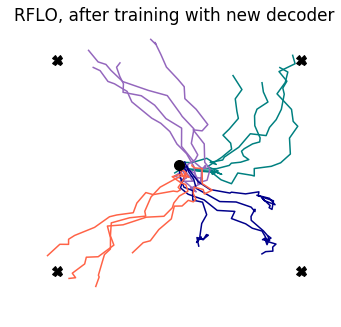

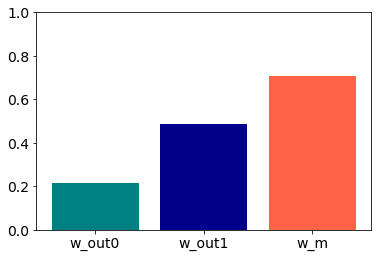

10it [00:00, 94.68it/s]

M norm: 0.89	 M angle: 0.71, 8 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.89	 w_out1 vs. w_m angle: 0.71
w_m norm: 1.52	 w_out vs. w_m angle: 0.46

500it [00:04, 112.87it/s]
1500it [00:16, 91.48it/s]
500it [00:04, 115.99it/s]


AR early fit 0.929, late fit 0.956


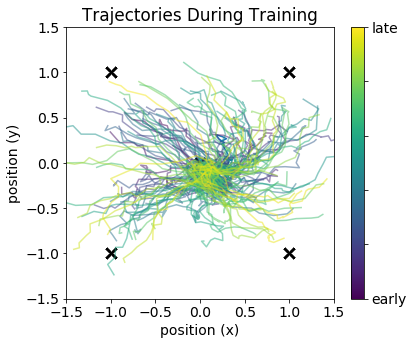

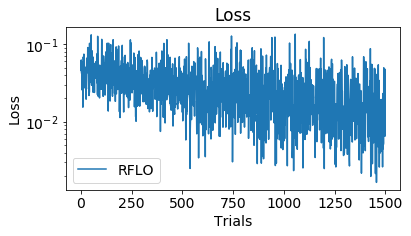

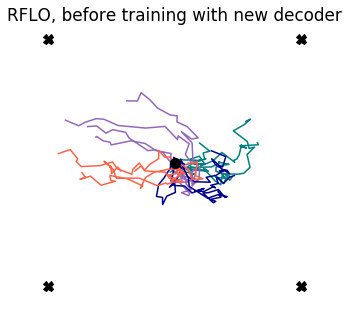

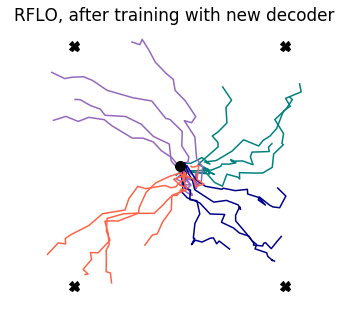

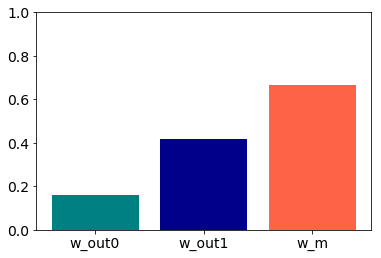

10it [00:00, 98.35it/s]

M norm: 0.72	 M angle: 0.80, 5 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.72	 w_out1 vs. w_m angle: 0.80
w_m norm: 1.55	 w_out vs. w_m angle: 0.42

500it [00:04, 121.36it/s]
1500it [00:15, 94.13it/s]
500it [00:04, 118.45it/s]


AR early fit 0.929, late fit 0.952


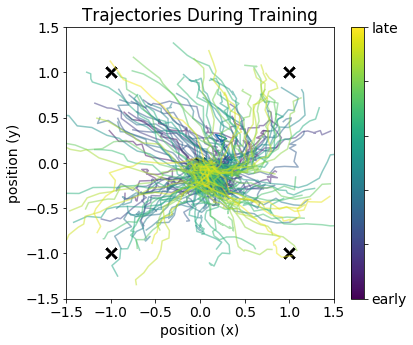

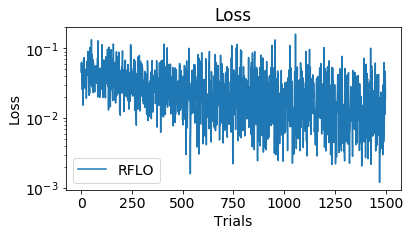

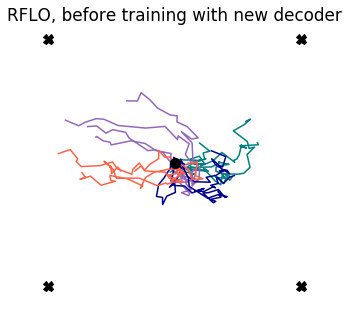

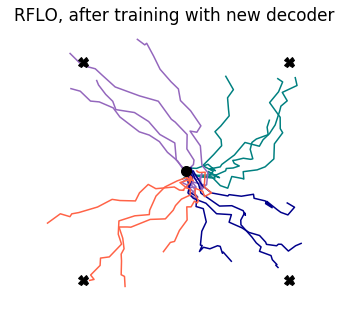

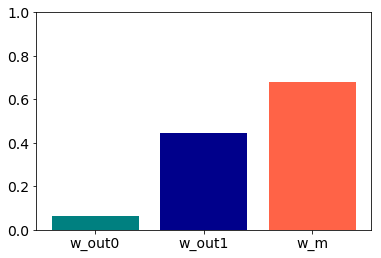

10it [00:00, 96.12it/s]

M norm: 0.53	 M angle: 0.90, 35 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.53	 w_out1 vs. w_m angle: 0.90
w_m norm: 1.54	 w_out vs. w_m angle: 0.45

500it [00:04, 113.06it/s]
1500it [00:16, 90.00it/s]
500it [00:04, 107.66it/s]


AR early fit 0.929, late fit 0.949


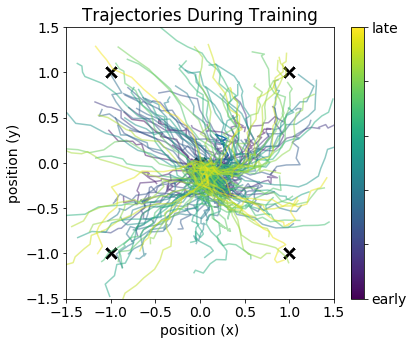

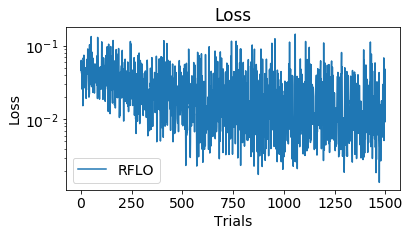

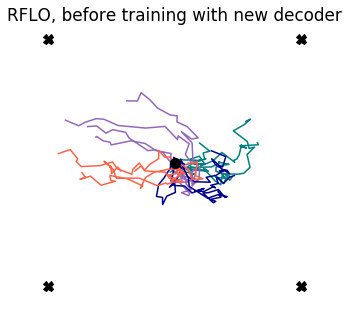

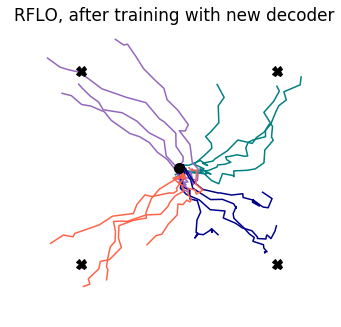

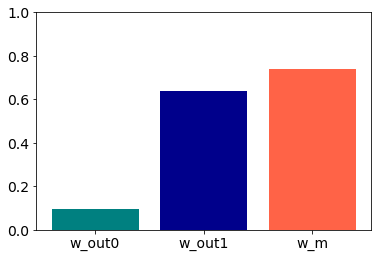

11it [00:00, 101.94it/s]

M norm: 0.00	 M angle: 1.00, 0 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.51
w_m norm: 0.00	 w_out1 vs. w_m angle: 1.00
w_m norm: 1.47	 w_out vs. w_m angle: 0.51

500it [00:04, 118.71it/s]
1500it [00:16, 93.67it/s]
500it [00:04, 124.15it/s]


AR early fit 0.929, late fit 0.948


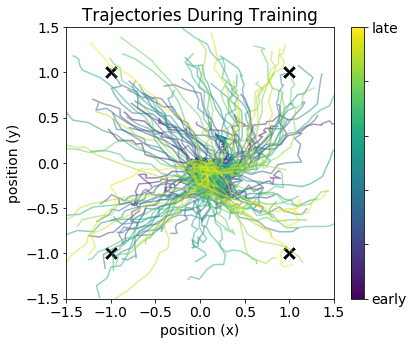

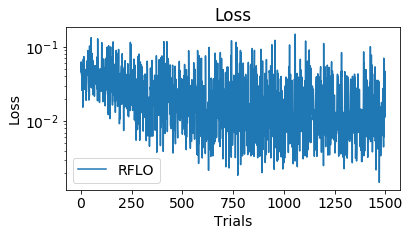

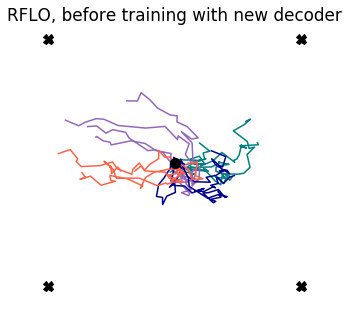

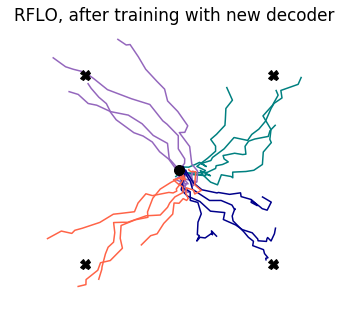

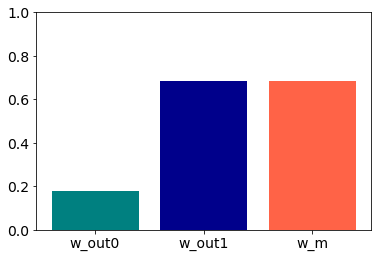

In [6]:
rnn_seed = 72
pretrain_duration = 2500
train_duration = 1500
test_duration = 500


# Set RNN Parameters
params = RNNparams(n_in=4,n_rec=50,n_out=2,tau_rec=10,
               eta_in=0.1,eta_rec=0.1,eta_out=0.1,
               sig_in=0.0,sig_rec=0.25,sig_out=0.01,
               velocity_transform=False, tau_vel = 0.8, dt_vel = 0.1,
               rng=np.random.RandomState(rnn_seed))
params.print_params()



# Initialize RNN
net0 = RNN(params)
sim0 = Simulation(net0)
rflo = RFLO(net0,apply_to=['w_rec'],online=False)
sim0.run_session(n_trials=pretrain_duration, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['loss'], plot=True, plot_freq=20)

fig0 = plot_trained_trajectories(sim=sim0, tasks=[task1,task2,task3,task4],title='Pretrain RFLO, train '+r'$W_{rec}$')






""" Average over multiple seeds """
seeds = [0,22,33,47]
overlaps = [0.4,0.5,0.6,0.7,0.8,0.9,1]
n_changes = [60,50,50,50,30,30,0]
overlap_w_out0 = 0.5
n_change_w_out0 = 50


stats = {}
stats['corr1'] = []
stats['corr2'] = []
stats['corr3'] = []
stats['corrcoef'] = []

stats['seeds'] = seeds
stats['overlaps'] = overlaps
stats['n_changes'] = n_changes
stats['overlap_w_out0'] = overlap_w_out0
stats['n_change_w_out0'] = n_change_w_out0
stats['frac_on'] = frac_on
stats['RNNparams'] = params
stats['pretrain_duration'] = pretrain_duration
stats['train_duration'] = train_duration
stats['test_duration'] = test_duration
stats['rnn_seed'] = rnn_seed
stats['comments'] = 'vary overlap between M and w_out1'

for seed in seeds:

    corr1_list = []
    corr2_list = []
    corr3_list = []
    corrcoef_list = []
    

    for overlap,n_change in zip(overlaps,n_changes):
        
        """ let overlap between w_out0 and w_out1 be constant """
        w_out1 = choose_aligned_matrix(net0.w_out.copy(),n_change=n_change_w_out0,overlap=overlap_w_out0,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)
        """ change overlap between w_out1 and w_m  """
        w_m = choose_aligned_matrix(w_out1,n_change=n_change,overlap=overlap,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)

        # confirm overlap between w_out1 and w_out
        norm, angle = return_norm_and_angle(net0.w_out,w_out1)
        print('\nw_out1 norm: {:.2f}'.format(norm) + '\t w_out vs. w_out1 angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out1 and w_m
        norm, angle = return_norm_and_angle(w_out1,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out1 vs. w_m angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out and w_m
        norm, angle = return_norm_and_angle(net0.w_out,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out vs. w_m angle: {:.2f}'.format(angle),end='')
        
        
        
        
        net1_pre = RNN(params)
        net1_pre.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net1_pre.set_weights(w_out = w_out1)
        net1_pre.set_weights(w_m = w_m.T)

        # unfortunately I need to make a different network to maintain integrity of pre and post simulations for plotting
        net1 = RNN(params)
        net1.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net1.set_weights(w_out = w_out1)
        net1.set_weights(w_m = w_m.T)




        """ Track activity with new decoder, before training """

        sim1_pre = Simulation(net1_pre)
        trackvars = TrackVars(net1_pre,apply_to=[]) 
        sim1_pre.run_session(n_trials=test_duration, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)
        #fig = plot_trained_trajectories(sim=sim1_pre, tasks=[task1,task2,task3,task4],title='RFLO, before training with new decoder')

        """ Train with new decoder """

        sim1_train = Simulation(net1)
        rflo = RFLO(net1,apply_to=['w_rec'],online=False)
        sim1_train.run_session(n_trials=train_duration, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['h','loss','err'], plot=True, plot_freq=10)

        """ Track activity with new decoder, after training """
        net1_post = RNN(params)
        net1_post.set_weights(w_in=net1.w_in.copy(), w_rec=net1.w_rec.copy())
        net1_post.set_weights(w_out = net1.w_out)
        net1_post.set_weights(w_m = net1.w_m)

        sim1_post = Simulation(net1_post)
        trackvars = TrackVars(net1_post,apply_to=[]) 
        sim1_post.run_session(n_trials=test_duration, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)

        
        fig = plot_trained_trajectories(sim=sim1_pre, tasks=[task1,task2,task3,task4],title='RFLO, before training with new decoder')

        fig = plot_trained_trajectories(sim=sim1_post, tasks=[task1,task2,task3,task4],title='RFLO, after training with new decoder')
        
        
        """ Calculate F fields """
        F_early, score_early = flow_field_data(sim1_pre.session_probes['h'])
        F_late, score_late = flow_field_data(sim1_post.session_probes['h'])

        print('AR early fit {:.3f}, late fit {:.3f}'.format(score_early,score_late))

        Fdata = F_late - F_early

        # separate train and test data from sim1_train
        n_total = len(sim1_train.session_probes['h'])
        n_train = int(0.5 * n_total)
        idx_train = np.random.RandomState(1975+seed).choice(np.arange(0,n_total),size=n_train,replace=False).astype(int)
        idx_test = np.arange(0,n_total)[~idx_train].astype(int)
        #idx_test=idx_train

        h_train = np.asarray(sim1_train.session_probes['h'])[idx_train,:,:,:]
        err_train = np.asarray(sim1_train.session_probes['err'])[idx_train,:,:,:]

        Fpred_w_out = flow_field_predicted(net0.w_out,err_train,h_train)
        Fpred_w_out1 = flow_field_predicted(w_out1,err_train,h_train)
        Fpred_w_m = flow_field_predicted(w_m,err_train,h_train)

        h_test = np.asarray(sim1_train.session_probes['h'])[idx_test,:,:,:]

        corr1 = calculate_flow_field_correlation(Fpred_w_out,Fdata,h_test) # could also sample sim_test
        corr1_list.append(corr1)

        corr2 = calculate_flow_field_correlation(Fpred_w_out1,Fdata,h_test) # could also sample sim_test
        corr2_list.append(corr2)

        corr3 = calculate_flow_field_correlation(Fpred_w_m,Fdata,h_test) # could also sample sim_test
        corr3_list.append(corr3)
        
        fig,ax = plt.subplots(1,1)
        plt.bar([0,1,2],[corr1,corr2,corr3],tick_label=['w_out0','w_out1','w_m'],color=['teal','darkblue','tomato'])
        plt.ylim([0,1])
        plt.show()
        
        
        
        
        
        
    # update
    stats['corr1'].append(corr1_list)
    stats['corr2'].append(corr2_list)
    stats['corr3'].append(corr3_list)
    #stats['corrcoef'].append(corrcoef_list)



In [22]:
""" save dict with unique name """
stats_rflo_m = stats

""" save dict """

save = False
tag = 'fig2b-5-18'


if save:
    
    with open(folder+'stats_rflo_m-'+tag+'.pickle', 'wb') as handle:
        pickle.dump(stats_rflo_m, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    print('\nsaved as '+folder+'stats_rflo_m-'+tag+'.pickle')



saved asfigs-2022-5-18/stats_rflo_m-fig2b-5-18.pickle


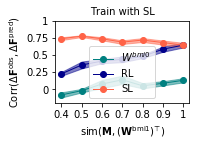

In [21]:
""" Same plot using flow field """
paper = True
save = True


fig,ax = plt.subplots(1,1,figsize=(6,4))

n_samples = len(stats_rflo_m['corr1'])
mn1 = np.mean(np.asarray(stats_rflo_m['corr1']),axis=0)
std1 = np.std(np.asarray(stats_rflo_m['corr1']),axis=0)
sem1 = std1/np.sqrt(n_samples)

mn2 = np.mean(np.asarray(stats_rflo_m['corr2']),axis=0)
std2 = np.std(np.asarray(stats_rflo_m['corr2']),axis=0)
sem2 = std2/np.sqrt(n_samples)

mn3 = np.mean(np.asarray(stats_rflo_m['corr3']),axis=0)
std3 = np.std(np.asarray(stats_rflo_m['corr3']),axis=0)
sem3 = std3/np.sqrt(n_samples)


plt.plot(overlaps,mn1,'o-',linewidth=1,label=r'$W^{bmi0}$',color='teal')
plt.fill_between(overlaps,mn1-sem1,mn1+sem1,alpha=0.5,color='teal')


plt.plot(overlaps,mn2,'o-',linewidth=1,label='RL',color='darkblue')
plt.fill_between(overlaps,mn2-sem2,mn2+sem2,alpha=0.5,color='darkblue')

plt.plot(overlaps,mn3,'o-',linewidth=1,label='SL',color='tomato')
plt.fill_between(overlaps,mn3-sem3,mn3+sem3,alpha=0.5,color='tomato')
plt.ylim([-0.2,1])
plt.legend()
plt.title('Train with SL')
plt.xlabel('sim('+r'$\mathbf{M},(\mathbf{W}^{\mathrm{bmi1}})^\top)$')
plt.ylabel('Corr'+r'$(\Delta \mathbf{F}^{\mathrm{obs}}, \Delta \mathbf{F}^{\mathrm{pred}})$')

plt.tight_layout()

if paper:
    fig,ax = paper_format(fig=fig,ax=ax,xlabels=[0.4,0.5,0.6,0.7,0.8,0.9,1],ylabels=[0,0.25,0.5,0.75,1],ticksize=10,linewidth=2,ylim=[-.2,1],figsize=(2.25,3))

plt.show()

if save:
    if paper:
        fig.savefig(folder+'fig2b-rflo-dF-change-m.pdf')
    else:
        fig.savefig(folder+'fig2b-rflo-dF-change-m_large.pdf')


# Part 2 - REINFORCE sweep

In [26]:
""" load data from 2022-5-5 """

file = '../NeurIPS-2022-4-29/figures-2022-5-05/stats_reinforce_wout.pickle'
with open(file, 'rb') as fp:
    stats_reinforce_wout = pickle.load(fp)

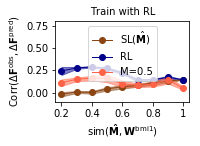

In [45]:
""" Same plot using flow field """

save = False
paper = True

overlaps = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

fig,ax = plt.subplots(1,1)
lw = 1
fs = 18




n_samples = len(stats_reinforce_wout['corr1'])
mn1 = np.mean(np.asarray(stats_reinforce_wout['corr1']),axis=0)
std1 = np.std(np.asarray(stats_reinforce_wout['corr1']),axis=0)
sem1 = std1/np.sqrt(n_samples)

mn2 = np.mean(np.asarray(stats_reinforce_wout['corr2']),axis=0)
std2 = np.std(np.asarray(stats_reinforce_wout['corr2']),axis=0)
sem2 = std2/np.sqrt(n_samples)

mn3 = np.mean(np.asarray(stats_reinforce_wout['corr3']),axis=0)
std3 = np.std(np.asarray(stats_reinforce_wout['corr3']),axis=0)
sem3 = std3/np.sqrt(n_samples)

plt.plot(overlaps[:],mn1,'o-',linewidth=lw,label='SL('+r'$\hat{\mathbf{M}})$',color='saddlebrown')
plt.fill_between(overlaps[:],mn1-sem1,mn1+sem1,alpha=0.5,color='saddlebrown')

plt.plot(overlaps[:],mn2,'o-',linewidth=lw,label='RL',color='darkblue')
plt.fill_between(overlaps[:],mn2-sem2,mn2+sem2,alpha=0.5,color='darkblue')

plt.plot(overlaps[:],mn3,'o-',linewidth=lw,label='M=0.5',color='tomato')
plt.fill_between(overlaps[:],mn3-sem3,mn3+sem3,alpha=0.5,color='tomato')

plt.legend(fontsize=fs)
plt.title('Train with RL',fontsize=fs)
plt.xlabel('sim('+r'$\mathbf{\hat{M}},\mathbf{W}^{\mathrm{bmi}1})$',fontsize=fs)
plt.ylabel('Corr'+r'$(\Delta \mathbf{F}^{\mathrm{obs}}, \Delta \mathbf{F}^{\mathrm{pred}})$')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

if paper:
    
    fig,ax = paper_format(fig=fig,ax=ax,xlabels=[0.2,0.4,0.6,0.8,1],ticksize=10,linewidth=2,ylim=[-0.1,0.8],figsize=(2.25,3))

    
else:
    plt.ylim([-0.2,0.8])


plt.tight_layout()
plt.show()


if save:
    if paper:
        fig.savefig(folder+'fig2b-reinforce-dF-change-alignment.pdf')
    else:
        fig.savefig(folder+'fig2b-reinforce-dF-change-alignment_large.pdf')

### Full simulation

Here, I pretrain a single network with decoder `W_bmi0` and then change the decoder to `W_bmi1` and train again with REINFORCE. Since REINFORCE does not rely on `W_m`, the only matrices we care about are `W_bmi0` and `W_bmi1`. Here I vary the alignment between these two decoders and then apply the two general metrics to the simulation results.

Note: Unfortunately this simulation takes a little too long, and might not be worth doing frequently. I've saved the results in a dict called `stats_reinforce_wout.pickle`


In [ ]:
# Set RNN Parameters
params = RNNparams(n_in=4,n_rec=50,n_out=2,tau_rec=10,
               eta_in=0.1,eta_rec=0.1,eta_out=0.1,
               sig_in=0.0,sig_rec=0.25,sig_out=0.01,
               velocity_transform=False, tau_vel = 0.8, dt_vel = 0.1,
               rng=np.random.RandomState(72))
params.print_params()

# Initialize RNN, train with RFLO
net0 = RNN(params)
sim0 = Simulation(net0)
rflo = RFLO(net0,apply_to=['w_rec'],online=False)
sim0.run_session(n_trials=2500, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['loss'], plot=True, plot_freq=20)

fig0 = plot_trained_trajectories(sim=sim0, tasks=[task1,task2,task3,task4],title='Pretrain RFLO, train '+r'$W_{rec}$')



""" Average over multiple seeds """
seeds = [0,22,33,47]
overlaps = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
n_changes = [75,75,60,50,50,50,30,30,1]

overlap_w_m = 0.5
n_change_w_m = 50


stats = {}
stats['corr1'] = []
stats['corr2'] = []
stats['corr3'] = []
stats['corrcoef'] = []

stats['seeds'] = seeds
stats['overlaps'] = overlaps
stats['overlap_w_m'] = overlap_w_m


for seed in seeds:

    corr1_list = []
    corr2_list = []
    corr3_list = []
    corrcoef_list = []
    
    covariance1_list = []
    covariance2_list = []
    covariance3_list = []

    for overlap,n_change in zip(overlaps,n_changes):
        
        print('\n~~~~ OVERLAP {}, SEED {}'.format(overlap,seed))
        print('\n')
        
        """ choose new decoder w_out1, change overlap """
        w_out1 = choose_aligned_matrix(net0.w_out.copy(),n_change=n_change,overlap=overlap,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)
        """ choose new internal model w_m, keep constant """
        w_m = choose_aligned_matrix(w_out1.copy(),n_change=n_change_w_m,overlap=overlap_w_m,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)

        # confirm overlap between w_out1 and w_out
        norm, angle = return_norm_and_angle(net0.w_out,w_out1)
        print('\nw_out1 norm: {:.2f}'.format(norm) + '\t w_out vs. w_out1 angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out1 and w_m
        norm, angle = return_norm_and_angle(w_out1,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out1 vs. w_m angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out and w_m
        norm, angle = return_norm_and_angle(net0.w_out,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out vs. w_m angle: {:.2f}'.format(angle),end='')
        
        
        
        
        net2_pre = RNN(params)
        net2_pre.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net2_pre.set_weights(w_out = w_out1)
        net2_pre.set_weights(w_m = 0*w_m.T) # shouldn't matter for REINFORCE

        # unfortunately I need to make a different network to maintain integrity of pre and post simulations for plotting
        net2 = RNN(params)
        net2.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net2.set_weights(w_out = w_out1)
        net2.set_weights(w_m = 0*w_m.T) # shouldn't matter for REINFORCE



        """ Track activity with new decoder, before training """

        sim2_pre = Simulation(net2_pre)
        trackvars = TrackVars(net2_pre,apply_to=[]) 
        sim2_pre.run_session(n_trials=1000, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)
        #fig = plot_trained_trajectories(sim=sim1_pre, tasks=[task1,task2,task3,task4],title='RFLO, before training with new decoder')

        """ Train with new decoder """

        sim2_train = Simulation(net2)
        reinforce = REINFORCE(net2,apply_to=['w_rec'],online=False,tau_reward=5)
        sim2_train.run_session(n_trials=15000, tasks=[task1,task2,task3,task4], learn_alg=[reinforce], probe_types=['h','reward','err'], plot=True, plot_freq=100)

        """ Track activity with new decoder, after training """
        net2_post = RNN(params)
        net2_post.set_weights(w_in=net2.w_in.copy(), w_rec=net2.w_rec.copy())
        net2_post.set_weights(w_out = net2.w_out)
        net2_post.set_weights(w_m = 0*net2.w_m) # shouldn't matter for REINFORCE

        sim2_post = Simulation(net2_post)
        trackvars = TrackVars(net2_post,apply_to=[]) 
        sim2_post.run_session(n_trials=1000, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)

        
        fig = plot_trained_trajectories(sim=sim2_pre, tasks=[task1,task2,task3,task4],title='REINFORCE, before training with new decoder')

        fig = plot_trained_trajectories(sim=sim2_post, tasks=[task1,task2,task3,task4],title='REINFORCE, after training with new decoder')
        
        
        """ Calculate F fields """
        F_early, score_early = flow_field_data(sim2_pre.session_probes['h'])
        F_late, score_late = flow_field_data(sim2_post.session_probes['h'])

        print('AR early fit {:.3f}, late fit {:.3f}'.format(score_early,score_late))

        Fdata = F_late - F_early

        # separate train and test data from sim1_train
        n_total = len(sim2_train.session_probes['h'])
        n_train = int(0.5 * n_total)
        idx_train = np.random.RandomState(1975+seed).choice(np.arange(0,n_total),size=n_train,replace=False).astype(int)
        idx_test = np.arange(0,n_total)[~idx_train].astype(int)
        #idx_test=idx_train

        h_train = np.asarray(sim2_train.session_probes['h'])[idx_train,:,:,:]
        err_train = np.asarray(sim2_train.session_probes['err'])[idx_train,:,:,:]

        Fpred_w_out = flow_field_predicted(net0.w_out,err_train,h_train)
        Fpred_w_out1 = flow_field_predicted(w_out1,err_train,h_train)
        Fpred_w_m = flow_field_predicted(w_m,err_train,h_train)

        h_test = np.asarray(sim2_train.session_probes['h'])[idx_test,:,:,:]

        corr1 = calculate_flow_field_correlation(Fpred_w_out,Fdata,h_test) # could also sample sim_test
        corr1_list.append(corr1)

        corr2 = calculate_flow_field_correlation(Fpred_w_out1,Fdata,h_test) # could also sample sim_test
        corr2_list.append(corr2)

        corr3 = calculate_flow_field_correlation(Fpred_w_m,Fdata,h_test) # could also sample sim_test
        corr3_list.append(corr3)
        
        fig,ax = plt.subplots(1,1)
        plt.bar([0,1,2],[corr1,corr2,corr3],tick_label=['w_out0','w_out1','w_m'],color=['teal','darkblue','tomato'])
        plt.ylim([0,1])
        plt.show()
        
        
        
    # update
    stats['corr1'].append(corr1_list)
    stats['corr2'].append(corr2_list)
    stats['corr3'].append(corr3_list)
    #stats['corrcoef'].append(corrcoef_list)
    


In [22]:
""" save dict with unique name """
stats_reinforce_wout = stats

""" save dict """

save = False
tag = 'fig2b-5-18'


if save:
    
    with open(folder+'stats_reinforce_wout-'+tag+'.pickle', 'wb') as handle:
        pickle.dump(stats_rflo_m, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    print('\nsaved as '+folder+'stats_reinforce_wout-'+tag+'.pickle')



saved asfigs-2022-5-18/stats_rflo_m-fig2b-5-18.pickle
